## Cargar y visualizar el dataset

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [21]:
df = pd.read_csv('../data/dataset_concatenado.csv')
df.head(20)

,age,bmi,gender,hypertension,heart_disease,stroke
0,67.0,36.60,0.0,0.0,1.0,1.0
1,80.0,32.50,0.0,0.0,1.0,1.0
2,49.0,34.40,1.0,0.0,0.0,1.0
3,79.0,24.00,1.0,1.0,0.0,1.0
4,81.0,29.00,0.0,0.0,0.0,1.0
5,74.0,27.40,0.0,1.0,1.0,1.0
6,69.0,22.80,1.0,0.0,0.0,1.0
7,78.0,24.20,1.0,0.0,0.0,1.0
8,81.0,29.70,1.0,1.0,0.0,1.0
9,61.0,36.80,1.0,0.0,1.0,1.0


In [22]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15273 entries, 0 to 15272
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15273 non-null  float64
 1   bmi            15273 non-null  float64
 2   gender         15273 non-null  float64
 3   hypertension   15273 non-null  float64
 4   heart_disease  15273 non-null  float64
 5   stroke         15273 non-null  float64
dtypes: float64(6)
memory usage: 716.1 KB


In [23]:
X = df.drop("stroke", axis=1)
y = df["stroke"]
print(X.shape)

(15273, 5)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Distribución original en y_train:", Counter(y_train))

Distribución original en y_train: Counter({1.0: 8432, 0.0: 3786})


In [15]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Después de aplicar SMOTE:", Counter(y_train_res))

Después de aplicar SMOTE: Counter({1.0: 8432, 0.0: 8432})


In [25]:
params = {

     'RandomForestClassifier': {'n_estimators': [135], # Already proved 100 and 50 
                              'max_depth': [15], # 5, 10
                              'min_samples_split': [7], # 5, 3
                              'min_samples_leaf': [6], # 2
                              'max_features': ['sqrt'],
                              'bootstrap': [True],
                              'random_state': [42]},
    
    #  'KNeighborsClassifier': {'n_neighbors': [7],
    #                           'weights': ['uniform'],
    #                           'metric' : ['minkowski']},

    #   'GradientBoostingClassifier': {'n_estimators': [110], # Already proved 100 and 200 good params 
    #                                'learning_rate': [0.5], # 0.1, 0.3
    #                                'max_depth': [15], # 5, 10
    #                                'min_samples_split': [8], # 5, 8
    #                                'min_samples_leaf': [6], # 2, 4
    #                                'subsample': [1], # 0.8
    #                                'max_features': ['sqrt'],
    #                                'random_state': [42]},

      'LGBMClassifier': {'n_estimators': [125], # Already proved 100, 120 and 110
                      'learning_rate': [0.1], # 0.05, 0.08
                      'num_leaves': [31], # 31, 22, 28
                      'max_depth': [-1],
                      'min_child_samples': [20], # 20
                      'subsample': [1], # 0.8, 0.5
                      'colsample_bytree': [1], # 0.8, 0.5
                      'random_state': [42]},

    # 'RidgeClassifier': {'alpha': [1.0],
    #                      'random_state': [42]},

     'XGBClassifier': {'n_estimators': [125], # Already proved 100, 120 and 105
                     'learning_rate': [1], # 0.05, 0.02
                     'max_depth': [16], # 5, 2, 8
                     'subsample': [1], # 0.8, 0.6, 1
                     'colsample_bytree': [1], # 0.8, 0.6, 1
                     'gamma': [0],
                     'reg_alpha': [0.1], # 0.1, 0.05
                     'reg_lambda': [1],
                     'use_label_encoder': [False],
                     'eval_metric': ['logloss'],
                     'random_state': [42]},

    # 'GaussianNB': {},
}

In [ ]:
import mlflow 
import mlflow.sklearn

models = {
    # 'KNN': KNeighborsClassifier(),
    # 'GradientBoosting': GradientBoostingClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    # 'Ridge': RidgeClassifier(),
    # 'Naive Bayes': GaussianNB(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier()
}

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Thirth Parameter Tuning")

resultados = []

for nombre_modelo, modelo in models.items():
    grid = params.get(nombre_modelo, [{}])
    for param_set in ParameterGrid(grid):
        print(f"\nEntrenando {nombre_modelo} con parámetros: {param_set}")
        modelo.set_params(**param_set)
        modelo.fit(X_train, y_train)

        y_train_pred = modelo.predict(X_train_res)
        y_test_pred = modelo.predict(X_test)

        acc_train = accuracy_score(y_train_res, y_train_pred)
        acc_test = accuracy_score(y_test, y_test_pred)

        f1_train = f1_score(y_train_res, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        acc_gap = acc_train - acc_test
        f1_gap = f1_train - f1_test

        report = classification_report(y_test, y_test_pred, output_dict=True)

        recall_clase_0 = report['0.0']['recall']
        recall_clase_1 = report['1.0']['recall']

        resultados.append({
            'Modelo': nombre_modelo,
            'Accuracy (train)': round(acc_train, 4),
            'Accuracy (test)': round(acc_test, 4),
            'Overfitting (acc)': round(acc_gap, 4),
            'F1-score (train)': round(f1_train, 4),
            'F1-score (test)': round(f1_test, 4),
            'Overfitting (f1)': round(f1_gap, 4),
        })

        # MLflow logging
        with mlflow.start_run(run_name=f"{nombre_modelo}"):
            mlflow.log_param("modelo", nombre_modelo)
            mlflow.log_params(param_set)
            mlflow.log_metric("accuracy_train", acc_train)
            mlflow.log_metric("accuracy_test", acc_test)
            mlflow.log_metric("f1_train", f1_train)
            mlflow.log_metric("f1_test", f1_test)
            mlflow.log_metric("acc_gap", acc_gap)
            mlflow.log_metric("f1_gap", f1_gap)
            mlflow.log_metric("recall", recall_score(y_train_res, y_train_pred, average='weighted'))
            mlflow.log_metric("recall_0", recall_clase_0)
            mlflow.log_metric("recall_1", recall_clase_1)

            # Registrar modelo en MLflow (automáticamente con sklearn)
            mlflow.sklearn.log_model(modelo, "modelo")

2025/06/12 11:34:55 INFO mlflow.tracking.fluent: Experiment with name 'Thirth Parameter Tuning' does not exist. Creating a new experiment.



Entrenando RandomForestClassifier con parámetros: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 135, 'random_state': 42}


2025/06/12 11:35:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Michael Lopez\Desktop\brainstroke-navm\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/480772844528099870/runs/16d9e265a7194025ad8d9a3dbb548b1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480772844528099870

Entrenando XGBClassifier con parámetros: {'colsample_bytree': 1, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 1, 'max_depth': 16, 'n_estimators': 125, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1, 'use_label_encoder': False}


2025/06/12 11:35:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/480772844528099870/runs/8a53bbb06bf24e7c9fefb905881b5d8c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480772844528099870

Entrenando LGBMClassifier con parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 125, 'num_leaves': 31, 'random_state': 42, 'subsample': 1}
[LightGBM] [Info] Number of positive: 8432, number of negative: 3786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 12218, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.690129 -> initscore=0.800724
[LightGBM] [Info] Start training from score 0.800724


2025/06/12 11:35:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBMClassifier at: http://127.0.0.1:5000/#/experiments/480772844528099870/runs/793f3902d25f4283955f6af8381ff99c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/480772844528099870


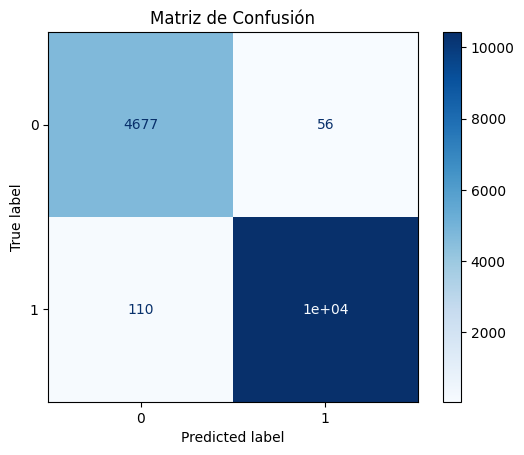

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0      0.977     0.988     0.983      4733
         1.0      0.995     0.990     0.992     10540

    accuracy                          0.989     15273
   macro avg      0.986     0.989     0.987     15273
weighted avg      0.989     0.989     0.989     15273

Accuracy general: 0.989


In [19]:
import pickle
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)
import matplotlib.pyplot as plt

# === 1. Cargar el modelo ===
ruta_modelo = '../models/model4.pkl'  
with open(ruta_modelo, 'rb') as archivo:
    modelo = pickle.load(archivo)

# === 2. Cargar los datos de prueba ===
ruta_datos = '../data/dataset_concatenado.csv'  
df = pd.read_csv(ruta_datos)

X_test = df.drop('stroke', axis=1)  
y_test = df['stroke']

# === 3. Hacer predicciones ===
y_pred = modelo.predict(X_test)

# === 4. Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# === 5. Métricas por categoría ===
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=3))

# === 6. Accuracy global ===
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy general: {acc:.3f}')


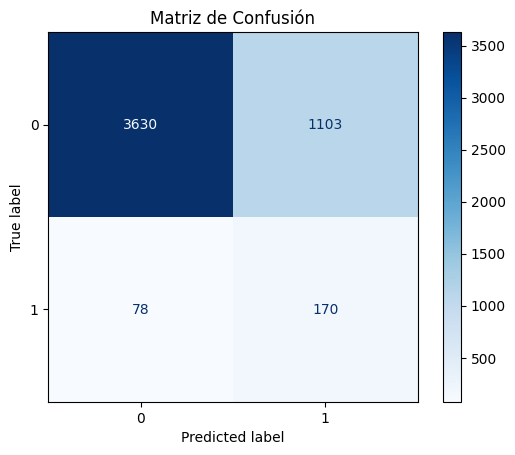

Reporte de Clasificación:
              precision    recall  f1-score   support

           0      0.979     0.767     0.860      4733
           1      0.134     0.685     0.224       248

    accuracy                          0.763      4981
   macro avg      0.556     0.726     0.542      4981
weighted avg      0.937     0.763     0.828      4981

Accuracy general: 0.763


In [9]:
import pickle
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)
import matplotlib.pyplot as plt

# === 1. Cargar el modelo ===
ruta_modelo = '../models/model3.pkl'  
with open(ruta_modelo, 'rb') as archivo:
    modelo = pickle.load(archivo)

# === 2. Cargar los datos de prueba ===
ruta_datos = '../data/dataset_encoded.csv'  
df = pd.read_csv(ruta_datos)

X_test = df.drop('stroke', axis=1)  
y_test = df['stroke']

# === 3. Hacer predicciones ===
y_pred = modelo.predict(X_test)

# === 4. Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# === 5. Métricas por categoría ===
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=3))

# === 6. Accuracy global ===
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy general: {acc:.3f}')


c:\Users\Michael Lopez\Desktop\brainstroke-navm\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Michael Lopez\Desktop\brainstroke-navm\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
1.5%

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Michael Lopez/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100.0%
2025/06/16 12:21:58 INFO mlflow.tracking.fluent: Experiment with name 'ICTUS ResNet50 Mejorado' does not exist. Creating a new experiment.


Epoch 1/15 | Loss: 101.2869 | Acc: 0.8969 | Precision: 0.8970 | Recall: 0.8969 | F1: 0.8969
Epoch 2/15 | Loss: 58.2835 | Acc: 0.9285 | Precision: 0.9286 | Recall: 0.9285 | F1: 0.9285
Epoch 3/15 | Loss: 46.1256 | Acc: 0.9431 | Precision: 0.9440 | Recall: 0.9431 | F1: 0.9434
Epoch 4/15 | Loss: 38.1756 | Acc: 0.9285 | Precision: 0.9298 | Recall: 0.9285 | F1: 0.9287
Epoch 5/15 | Loss: 32.6138 | Acc: 0.9465 | Precision: 0.9467 | Recall: 0.9465 | F1: 0.9465
Epoch 6/15 | Loss: 19.0035 | Acc: 0.9476 | Precision: 0.9506 | Recall: 0.9476 | F1: 0.9482
Epoch 7/15 | Loss: 20.1310 | Acc: 0.9465 | Precision: 0.9492 | Recall: 0.9465 | F1: 0.9470
Epoch 8/15 | Loss: 16.7301 | Acc: 0.9577 | Precision: 0.9591 | Recall: 0.9577 | F1: 0.9580
Epoch 9/15 | Loss: 14.5823 | Acc: 0.9577 | Precision: 0.9577 | Recall: 0.9577 | F1: 0.9576
Epoch 10/15 | Loss: 13.0237 | Acc: 0.9707 | Precision: 0.9712 | Recall: 0.9707 | F1: 0.9708
Epoch 11/15 | Loss: 7.7643 | Acc: 0.9724 | Precision: 0.9729 | Recall: 0.9724 | F1: 0.97

2025/06/16 16:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run zealous-rook-683 at: http://127.0.0.1:5000/#/experiments/598672197618892508/runs/0cc8c21c9f8845ff9221df092b236843
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/598672197618892508


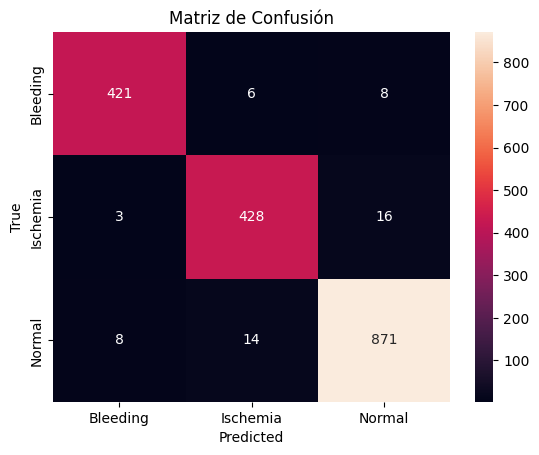

In [3]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.pytorch
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
epochs = 15
learning_rate = 1e-4
data_dir = "data2"

# Transforms con data augmentation mejorado
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomApply([transforms.RandomRotation(20)], p=0.5),
    transforms.RandomApply([transforms.ColorJitter(0.3, 0.3, 0.3, 0.1)], p=0.5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# Dataset y DataLoader
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=4)

# Cálculo de pesos con clases de train_ds
train_labels = [dataset.targets[i] for i in train_ds.indices]
class_counts = Counter(train_labels)
class_weights = 1.0 / torch.tensor([class_counts[i] for i in range(len(class_counts))], dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

# Modelo con ResNet50
model = torchvision.models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 3)
)
model = model.to(device)

# Optimizador y scheduler
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# MLflow tracking
mlflow.set_experiment("ICTUS ResNet50 Mejorado")

best_f1 = 0
patience = 4
wait = 0

with mlflow.start_run():
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("learning_rate", learning_rate)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validación
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1).cpu()
                all_preds.extend(preds)
                all_labels.extend(labels.cpu())

        acc = accuracy_score(all_labels, all_preds)
        report = classification_report(all_labels, all_preds, target_names=dataset.classes, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss:.4f} | Acc: {acc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

        # MLflow logs
        mlflow.log_metric("val_accuracy", acc, step=epoch)
        mlflow.log_metric("val_precision", precision, step=epoch)
        mlflow.log_metric("val_recall", recall, step=epoch)
        mlflow.log_metric("val_f1", f1, step=epoch)
        mlflow.log_metric("lr", scheduler.get_last_lr()[0], step=epoch)

        scheduler.step()

        # Early Stopping
        if f1 > best_f1:
            best_f1 = f1
            wait = 0
            torch.save(model.state_dict(), "best_model.pt")
        else:
            wait += 1
            if wait >= patience:
                print("\u23f9\ufe0f Early stopping activado.")
                break

    mlflow.pytorch.log_model(model, "model")

# Mostrar matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import os
import csv

# 🧠 Cargar el modelo
model = torch.load("model2.pth", map_location=torch.device('cpu'), weights_only=False)
model.eval()

# 🎯 Clases
CLASSES = ['Bleeding', 'Ischemia', 'Normal']

# 🔄 Transformaciones (ajústalas si cambiaste en entrenamiento)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Extensiones válidas
extensiones_validas = ['.jpg', '.jpeg', '.png']

def es_imagen(nombre_archivo):
    return os.path.splitext(nombre_archivo)[1].lower() in extensiones_validas

# 📂 Recorre subdirectorios también
def predecir_en_carpeta_y_guardar_csv(carpeta, salida_csv):
    resultados = []

    for root, dirs, archivos in os.walk(carpeta):  # <-- Recorre también subdirectorios
        for nombre_archivo in archivos:
            if not es_imagen(nombre_archivo):
                continue

            ruta_img = os.path.join(root, nombre_archivo)

            try:
                img = Image.open(ruta_img).convert('RGB')
            except Exception as e:
                print(f"❌ No se pudo abrir {ruta_img}: {e}")
                continue

            img_t = transform(img).unsqueeze(0)

            with torch.no_grad():
                salida = model(img_t)
                probs = torch.softmax(salida, dim=1)
                pred_idx = probs.argmax(dim=1).item()
                confianza = probs[0, pred_idx].item()

            clase_predicha = CLASSES[pred_idx]
            resultados.append([ruta_img, clase_predicha, round(confianza, 4)])

            print(f"🖼 {ruta_img} → {clase_predicha} ({confianza:.2f})")

    # ✅ Guardar CSV si hay resultados
    if resultados:
        with open(salida_csv, mode='w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['ruta_imagen', 'clase_predicha', 'confianza'])
            writer.writerows(resultados)
        print(f"\n✅ Predicciones guardadas en: {salida_csv}")
    else:
        print("⚠️ No se encontraron imágenes válidas para predecir.")

# ▶️ Ejecutar
predecir_en_carpeta_y_guardar_csv("External_Test/PNG", "predicciones_mejorado.csv")


🖼 External_Test/PNG\10007.png → Bleeding (1.00)
🖼 External_Test/PNG\10029.png → Bleeding (1.00)
🖼 External_Test/PNG\10189.png → Normal (1.00)
🖼 External_Test/PNG\10200.png → Normal (0.99)
🖼 External_Test/PNG\10231.png → Ischemia (0.86)
🖼 External_Test/PNG\10241.png → Ischemia (1.00)
🖼 External_Test/PNG\10267.png → Normal (1.00)
🖼 External_Test/PNG\10300.png → Normal (1.00)
🖼 External_Test/PNG\10301.png → Normal (1.00)
🖼 External_Test/PNG\10319.png → Normal (1.00)
🖼 External_Test/PNG\10360.png → Normal (1.00)
🖼 External_Test/PNG\10437.png → Bleeding (1.00)
🖼 External_Test/PNG\10461.png → Bleeding (0.92)
🖼 External_Test/PNG\10467.png → Normal (1.00)
🖼 External_Test/PNG\10493.png → Normal (1.00)
🖼 External_Test/PNG\10494.png → Normal (1.00)
🖼 External_Test/PNG\10641.png → Normal (1.00)
🖼 External_Test/PNG\10693.png → Normal (1.00)
🖼 External_Test/PNG\10785.png → Bleeding (1.00)
🖼 External_Test/PNG\10833.png → Normal (0.96)
🖼 External_Test/PNG\10910.png → Normal (1.00)
🖼 External_Test/PNG\

In [17]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from torch.serialization import safe_globals
from torchvision.models import resnet
import os

# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "model2.pth"
data_dir = "data2"
class_names = ["Bleeding", "Ischemia", "Normal"]

# Transforms de validación
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# Dataset y DataLoader
val_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ⚠️ Cargar modelo completo, permitiendo la clase ResNet
with safe_globals([resnet.ResNet]):
    model = torch.load(model_path, map_location=device, weights_only=False)

model = model.to(device)
model.eval()

# Evaluación
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Reporte de métricas
report = classification_report(all_labels, all_preds, target_names=class_names)
print(report)


              precision    recall  f1-score   support

    Bleeding       1.00      0.99      0.99      2186
    Ischemia       0.99      0.99      0.99      2260
      Normal       0.99      0.99      0.99      4427

    accuracy                           0.99      8873
   macro avg       0.99      0.99      0.99      8873
weighted avg       0.99      0.99      0.99      8873

